In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


<img src="../images/Ensemble_methods.jpg" alt="ensemble methods" style="width: 500px;"/>

## Program so far

***

- Basics of Python
- Descriptive and Inferential Statistics
- Linear Regression
- L1/L2 Regularization
- Basic data cleaning and Preprocessing
- Feature extraction and Feature engineering
- Logistic Regression
- Decision Trees

## Agenda
***
- What is ensembling?
- Types of ensembling
- Naive aggregation or voting
- Bootstrap Aggregating or Bagging
- Stacking
- Introducing Random Forests
- Hyperparameters for Random Forests

## Lucius goes to John
***
Lucius goes on a pilot trip to visit certain universities in Brooklyn. On his way back he decided to pay a visit to John. He got a six-pack of Heineken a rushed to John's place.

A much more confident John, played an excellent host to Lucius. While discussing, Lucius discussed a few issues that he was facing. Lucius was through with Decision Trees, but being an Applied Math enthusiast, he was not satisfied with the result. ("You know how they are!") He was wondering if anything better could be done.

John invited Jay over as he lived only a couple of blocks away.

## Jay Helps
***
Jay patiently paid an ear to Lucius's problem, and beamed with excitement, **what's better than one learner? -- multiple learners!**

Let's understand more, but before that, let's get over with the routine stuff.

In [ ]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('../data/loan_prediction.csv')
dataframe.head()

Split the original data into train & test data, with the column `Loan Status` as the target variable.

In [ ]:
from sklearn.model_selection import train_test_split

X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## More is better than one! (1/2)
***
The idea of **the wisdom of crowds** has been popular since as far back we go, and for a reason. It has been found that the collective intelligence of many often surpasses the intelligence of a single expert.

So we don't need to be experts to understand that using multiple learners to make predictions would help!

## More is better than one! (2/2)
***

Methods of improving model performance by aggregating predictions over several learners are known as **ensemble methods.** Ensembling helps improvise on the stability and predictive power of the model.

Ensemble modeling is a powerful way to improve the performance of your model. It usually pays off to apply ensemble learning over and above various models you might be building. 

## Introduction to Ensemble Methods
***
Let's explore this technique of Ensembling using a philosophical thought process.

#### Condorcet’s Jury Theorem
Let's say a jury of voters need to make a decision regarding a binary outcome (for example to convict a defendant or not).

If each voter has a probability p of being correct and the probability of a majority of voters being correct is L, then **L > p if p > 0.5** if the voters as independent from each other. Interestingly, **L approaches 1 as the number of voters approaches infinity**.

In [ ]:
10 jury memebers - are independent
each individual jury had a probability of making the right decision = p (< 0.6 ) ----> weak decision makers
for 100 memebrs, proba = L
L >> p, if individully p > 0.5

p = 0.5
L >>> p
L = 0.8, 0.9

Decision: Candidate is guilty
P(C = Guilty) = L (10 memeber jury)

1 - 1| 0.55
2 - 1| 0.57
3 - 0| 0.2
4 - 0| 0.2
...

vote = 
mean = 

In [ ]:
Data 
toss coin

## Introduction to Ensemble Methods
***
#### Condorcet’s Jury Theorem

In human language, p > 0.5 means that the individual judgments (votes) are at least a little better than random chance.

Now, let's take this analogy to the world of ML:

* Verdict --> classification prediction
* Jury members --> ML models
* votes --> individual predictions

This means that employing multiple ML models should improve the performance according to the Condorcet's theorem, and it does!

## Building an intuition (1/2)
***
Let's say I am interested in buying the new iphone model since I have an extra kidney anyway.

However, I am not sure if it is a good model or not. So I ask a bunch of people

1. A mobile shopkeeper, whose opinions about a mobile phone model are 80% times correct
2. A YouTube gadget reviewer, who is 70% times correct in her opinions about a gadget
3. My friend, who is 60% of times correct

In [ ]:
mobile shopkeeper = ML1 (DT, Logistic) = accuracy = 0.8
YouTube gadget reviewer = ML2 () accu = 0.7
Friend = ML3, acc = 0.6

## Building an intuition (2/2)
***
I decide that I will buy the phone if all of them recommend it, and all of them do! In such a case, what is the probability of the new phone turning out to be a bad model?

It will be same as the probability of all of them being wrong simultaneously 

>* P = (1 - 0.8) x (1 - 0.7) x (1 - 0.6)
>* P = 0.024

Which means that there is 97.6% chance that the phone will be good, given their opinions are independent from each other.

Ensemble works on similar principles.

In [ ]:
HHH
HHT
HTH
..
TTT

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Strong Learners vs Weak Learners
***
We discussed how we only need a large number of learners, whose predictive power is just slightly better than random chance (tossing a coin in case of binary classification problem!) for ensembling to work. Such learners have a special name -- "weak learners".

* **Weak Learner:**
Given a labeled dataset, a Weak Learner produces a classifier which is at least a little more accurate than random classification.
* **Strong Learner:**
We call a machine learning model a Strong Learner which, given a labeled dataset, can produce a classifier to arbitrary accuracy.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Ensemble of Weak Learner
***
Given the formulation above, the question we want to ask is this:
      
**Can an ensemble of weak classifiers produce a single strong classifier?**

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Ensemble of Wise Learners (1/2)
***
To build ensemble models, we combine multiple models using different methods and hope that the wisdom of the crowd outperforms any individual model. 

Naturally, not all crowds are wise (for example, greedy investors of a stock market bubble). 

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Ensemble of Wise Learners (2/2)
***
**Surowiecki** presents a simple framework to evaluate if a given crowd is wise:
* **Independence :** Members’ opinions are not determined by the opinions of those around them.
* **Diversity of opinion :** Each member should have private information even if it is just an eccentric interpretation of the known facts.
* **Decentralization :** Members are able to specialize and draw conclusions based on local knowledge.
* **Aggregation :** Some mechanism exists for turning private judgments into a collective decision.

In [ ]:
Economics
10 Biology

Surowiecki's framework helps us make sure that the ensemble of ML learners improve overall performance by

* Decreasing the variance 
* Decreasing/Keeping the bias same as individual model
* Improving the predictive force

Bias-Variance Tradeoff
Bias = Form of the model
Variance = Deviation of decision from one data point to other

Low Bias, Low Variance
LR - High Bias, Low Variance = linearity relationship between input and output
TR - 0.6
Test - 0.6

DT - Low Bias, High Variance - There is no underlying assumption about the data point 
Tr - 0.9
Test - 0.6

Low Bias and Low Variance

In [ ]:
Central Limit Theorem
N(mean = pop, variance = sigma^2/N)

## How Ensemble Method Work
***
Lucius, being in a hurry was keen to jump on how to do things rather than fundamental concepts.

## So How does Ensemble Method Work
***
Every ensemble algorithm consists of two steps:

* Producing a cohort of predictions using simple ML algorithms.
* Combining the predictions into one "aggregated" model.

Ensemble can be achieved through several techniques. 

## Back to Lucius
***
As Lucius has a background of applied maths, he has built a strong intuition over the years. Lucius pointed out that the most obvious and intuitive way would be to average out all the possibilities and that would be the final output. Indeed, it was.

He was referring to an ensemble method called **Aggregation** or **Voting Ensemble**. 

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Naive Aggregation
***
Naive aggregation works by aggregating the final output through averaging (regression) or voting (classification).

- A more sophisticated ensemble might assign weights to the predictions by different learners while aggregating.

- Works best with algorithms which learn very differently from each other, thereby complementing each others' decisions

**Brain teaser :**
When does a voting classifier out do its base learner and when it doesn’t?

In [ ]:
P(y = 1) = 1/1+e() 

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Soft Voting vs Hard Voting
***
Since, every classification algorithm first calculates the probabilities of each outcome, and them produces the prediction, the aggregation could be done either on calculated probabilities, or final predictions.

* In **hard voting**, the voting classifier takes majority of its base learners’ predictions
* In **soft voting**, the voting classifier takes into account the probability values by its base learners 

In general, Soft voting has been observed to perform better than hard voting.

Let's apply Soft Voting and Hard Voting on the loan prediction dataset. We can pass in a number of classifiers to it. We also check the accuracy by both these methods. We will be using the `VotingClassifier` class in sklearn.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
decision_clf1 = DecisionTreeClassifier(max_depth=3)
decision_clf2 = DecisionTreeClassifier(max_depth=5)

In [ ]:
# Hard Voting
voting_clf_hard = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                 ('Decision Tree 1', decision_clf1),
                                                 ('Decision Tree 2', decision_clf2)],
                                   voting = 'hard')

voting_clf_hard.fit(X_train, y_train)
y_pred_hard = voting_clf_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)

In [ ]:
# Soft Voting
voting_clf_soft = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                 ('Decision Tree 1', decision_clf1),
                                                 ('Decision Tree 2', decision_clf2)],
                                   voting = 'soft')
voting_clf_soft.fit(X_train, y_train)
y_pred_soft = voting_clf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

In [ ]:
print("Hard voting accuracy: %.4f" %(accuracy_hard))
print("Soft voting accuracy: %.4f" %accuracy_soft)

In [ ]:
3 phase steps for model building

Remember - No model is best

1. Phase 1 - Always build simple - builds easily, intuitive and has explanatory power (Lr, DT) 
2. Phase 2 - Complex model - RF, Boosting, take sometime to build, lose out on explanatory, gain acc
3. Phase 3 - very complex model - Stacking, DL, take sometime to build, lose out on explanatory, gain acc

In [ ]:
Collection
1. Mix - Voting, Blending, Stacking
2. Same - Bagging (DT, Logistic) --- > Bootstrapped Samples
3. Specific - Random Forest  --- > Bootstrapped Samples + Random Feature Selection

In [ ]:
Bootstrap Samples

## The idea of specialists:
***
Jay was thinking silently the whole time. After a while, he said, **what could better than the wisdom of crowds? --> wisdom of diverse experts!**.

This reminded him of the *mantri mandal* of the kings in the older times, where each minister used be an expert of a particular area and the king would ask for opinions from them before taking any major decisions.

Unknowingly, Jay was stumbling over a technique called **Bagging**.

## Example (1/2)
***
Let’s understand this idea better through an example of a multi-speciality hospital. Let’s say the hospital has 3 medical interns which the management can train. Moreover, the hospital deals with 3 types of cases: 
* Heart diseases
* Broken bones
* Cancer

Now, the management has 2 ways in which they can be trained:
* All the interns handle all types of cases 
* Each intern handle a specific type of case

## We know how interns are..
***
![hospital](../images/hospital.jpg)

## Example (2/2)
***
If the management chooses option 1, they will create 3 doctors who can take care of a wide range of cases but since their exposure to each type of case is limited, they will be generalists: MBBS doctors

On the other side, if the management lets each intern work on a single category of cases, they can become specialists in their respective areas: A cardiologist, an orthopedist and an oncologist.

**Similarly, in bagging, by training each base learner on different sample of data, we make specialist base learners.**

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Bagging
***
Bagging stands for **B**ootstrap **Agg**regat**ing**.

In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. 

Unlike naive aggregator, bagging uses a single type of base learner. Bagging is a method that involves manipulating the training set by resampling. We learn k base classifiers on k different samples of training data.

## The B in Bagging -- Bootstrapping
***
* The samples are independently created by resampling the training data using uniform weights

* This means that the sampling of data points happens with replacement. The process of **sampling with replacement is called Bootstrapping.**

## Bias - Variance trade-off
***
Because of bootstrapping, each individual predictor has **a higher bias** than if it were trained on the original training set. 

However, a large number of such biases will cancel each other out when aggregated, hence the bias of the resulting bagging is only slightly higher than a comparable single predictor strong learner. 

At the same time, because bagging provides a way to reduce overfitting, the variance of resulting strong learner reduced significantly.

Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.

## Bagging reduces Variance
***
![bagging](../images/image22.png)

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>

<br />

## And bagging is practical!
***
* The learners can all be trained in parallel, via different CPU cores or even different servers. 
* Similarly, predictions can be made in parallel. 
* This is one of the reasons why bagging ensembles are such popular methods: **they scale very well.**

Now, lets apply Bagging to the above dataset.
We will compare the accuracy of a single learner against an Ensemble of learners.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression()
decision_clf = DecisionTreeClassifier()

# Fitting single decision tree
decision_clf.fit(X_train, y_train)
y_pred_decision = decision_clf.predict(X_test)
score_dt = accuracy_score(y_test, y_pred_decision)

In [ ]:
# Fitting single decision tree
log_clf.fit(X_train, y_train)
y_pred_decision = log_clf.predict(X_test)
score_lr = accuracy_score(y_test, y_pred_decision)

In [ ]:
score_dt
score_lr

In [ ]:
# Fitting bagging classifier with Logisitc Regression
bagging_clf1 = BaggingClassifier(LogisticRegression(), n_estimators=100, max_samples=100, 
                                bootstrap=True, random_state=9)

bagging_clf1.fit(X_train, y_train)
y_pred_bagging = bagging_clf1.predict(X_test)
score_bc_lr = accuracy_score(y_test, y_pred_bagging)

In [ ]:
# Fitting bagging classifier with Decision Tree
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, 
                                bootstrap=True, random_state=9)

bagging_clf2.fit(X_train, y_train)
y_pred_bagging = bagging_clf2.predict(X_test)
score_bc_dt = accuracy_score(y_test, y_pred_bagging)

In [ ]:
print("decision tree accuracy %.4f" %(score_dt))
print("bagging classifier (decision tree) accuracy %.4f" %(score_bc_dt))
print("======================================")
print("logistic regression accuracy %.4f" %(score_lr))
print("bagging classifier (logistic regression) accuracy %.4f" %(score_bc_lr))

We can easily observe that the accuracy of a BaggingClassifier is much better then that of a single decision tree, but not in case of logistic regression, why? -- more on this later.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Pasting
***
Just as in bagging we create samples through repeated resampling with replacement, we can create samples **with repeated resampling without replacement** for each base learner. Ensemble on such samples is known as **pasting**.

## Bagging vs Pasting (1/2)
***
* Both bagging and pasting allow training instances to be sampled several times across multiple predictors
* But only bagging allows training instances to be sampled several times for the same predictor.
* Bootstrapping introduces a bit more diversity in the subsets that each predictor is trained on, so bagging ends up with a slightly higher bias than pasting
* This also means that predictors end up being less correlated so the ensemble’s variance is reduced. 

## Bagging vs Pasting (2/2)
***
* Overall, bagging often results in better models, which explains why it is generally preferred. 
* However, given spare time and CPU power it is worth using cross- validation to evaluate both bagging and pasting and select the one that works best.

## Out of Bag Evaluation (1/2)
***
Lucius, being a mathematician, was wondering something about bootstrapping:

For bootstrapping with n samples,

* The probability of each sample being selected is 1/n
* Hence, the probability of not being selected is (1-1/n)
* If m such samples are created, then the probability of a sample never being selected is p =  (1-1/n)<sup>m</sup>
* When n and m approach large numbers, p ~ e-1 ~ 0.368

## Out of Bag Evaluation (2/2)
***
"Aha!" said, Lucius, "This means that for each bootstrapping, around 3rd of the original sample will end up not being selected!"

Jay started following the idea: Since a predictor never sees the OOB instances during training, it can be evaluated on these instances, without the need for a separate validation set or cross-validation

And since this unselected sample is not in the bag, this validation called **out-of-bag evaluation**

Similar to the above approach, we just add a new parameter `oob_score` and set it to True, whose default value is False. We also, check out its accuracy.

In [ ]:
out_of_bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=9),
                                   n_estimators=100,
                                   max_samples=100,
                                   bootstrap=True,
                                   oob_score=True,
                                   random_state=9)
out_of_bag_clf.fit(X_train, y_train)
y_pred = out_of_bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
out_of_bag_clf.oob_score_

In [ ]:
Voting - Individual models which were diff (data points are same), then doing agg
Bagging, Pasting - Individual models which were same (data points are diff), then doing agg, 
Random Forest -  Individual models (DT) which were same (data points are diff, models are also diff), then doing agg, 

## Special Mention: The Random Forest
***
* Random Forest is a bagging algorithm with decision tree as base classifier/regressor
* The Random Forest algorithm introduces extra randomness when growing trees 
* Instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. 
* This bootstrapping results in a greater tree diversity, which trades a higher bias for a lower variance, generally yielding an overall better model.

## John catches up
***
It took John a bit of time to take in all the "wisdom" imparted on it, but once it all settled, John came up with an idea of his own. Let's hear it:

So far we have used methods like **averaging** and **voting** to aggregate the predictions by all the base learners, thereby we have assigned same weights to the predictions made by the base learners.

However, it might be possible that some base learners might be better at predicting than the others. So, a better aggregation scheme could be to assign some kind of weights to the predictions made by base learners!

And since we have been learning machine learning to predict things anyway,... you see where we are going with this?

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Stacking
***

Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier
It is based on a simple idea: instead of using trivial functions to aggregate the predictions of all predictors in an ensemble, we train a model to perform this aggregation.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Stacking
***

![stacking](../images/image23.png)

## How Stacking works?
***
* First, the training set is split in two subsets. 
* The first subset is used to train the predictors in the first layer
* Next, the first layer predictors are used to make predictions on the second (held-out) set
* This ensures that the predictions are “clean,” since the predictors never saw these instances during training.
* The meta-classifier is trained on this new training set, so it learns to predict the target value given the first layer’s predictions.


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Stacking with `mlxtend`
***
Sadly, stacking is not implemented in sklearn.

Scikit-Learn does not support stacking directly, luckily but it is not very hard to create your own stacking ensemble. Alternatively a python library called mlextend supports stacking and has very similar api as sklearn!

Check out the link for `Stacking` implementation in a python library called **[mlxtend](https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/)**.

You can install it using the `pip` command: `pip install mlxtend`

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier() 
models = [log_clf, decision_tree_clf]

In [ ]:
stacking_clf = StackingClassifier(classifiers = models,
                                 meta_classifier = decision_tree_clf)

stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

## Lucius & New York
***
- After spending a few days at John's in Brooklyn, Lucius was going to the Grand Central Railway Station to head back home 

- He was in a cab and as usual, it was taking a lot time traveling from Brooklyn to Grand Central

- In the cab, he realized that his cab can take multiple routes to the SAME destination




<center><img src="../images/rf1.png" alt="Drawing" style="width: 400px;"/></center>

## Lucius & New York
***
 - He pondered upon this a lot while he was on the train, returning home 
 
 - He thought that what if he could use multiple Decision Trees to help in out in his model? 
 
 - He doesn't HAVE to pick the best one (like how Google Maps picks the best route) 
 
 - He could use the average of all predictions
 
 - Intuitively, this does seem like a good approach. More models will give a more robust prediction



## Lucius' Approach 
***
- He thought to use multiple trees as using just 1 tree limits his predictions to constrained by the specified hyper-parameters 

- Thus, the Decision Tree by itself did lack a few important characteristics

- Let's see what they were and understand what Lucius was trying to achieve 




## Revisiting Decision Trees 
***
- We went through the shortcomings of decision trees
    - They overfit
    - They are structurally unstable since we need to find the optimal hyper-parameters in order to interpret the result
    
    
- Therefore, by using a greater number of Trees a.k.a a "Forest", Lucius thought that this is 1 way of getting a better fitting model and prediction



<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Random Forest 
***
- In Random Forest, we learned that 'bagging' is used to create multiple Decision Trees with minimal correlation

- In bagging, a random subset of the training data is selected to train each tree

- Furthermore, the model randomly restricts the variables which may be used at the splits of each tree. Hence, the trees grown are dissimilar, but they still retain certain predictive power.

- Let's build our intuition through an easy example and then return back to Lucius' Approach




## Example - People's first preference of Entertainment
***
 - A random sample of people were given 3 options when asked what their preferred mode of entertainment were. These options were :


 1. Watching TV/Movies Online and at home (Netflix, etc) 
 2. Going to the Movie Theaters 
 3. Watching a live Play 



## Entertainment
***
- The information (variables) available in the dataset for each individual is the following:

1. Age , 2. Gender,  3. Highest educational qualification, 4. Working in Industry, 5. Residence in Metro/Non-metro

We need to come up with an algorithm to give an accurate prediction for an individual who has following traits:

1. Age : 35 years , 2, Gender : Male , 3. Highest Educational Qualification : Diploma holder, 4. Industry : Manufacturing, 5. Residence : Metro

We will only talk about random forest to make this prediction in our example



In [ ]:
Age , Gender, Highest educational qualification, Working in Industry, Residence in Metro/Non-metro - Features
Prefernece - Target


<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## How the RF Algorithm works
*** 
 - Deviating from our example, say, we have a random 1000 observations of Mexicans with 10 variables
 
 - Random forest tries to build multiple CART models with different samples and different initial variables. 
 
 - For instance, it will take a random sample of 100 observation and 5 randomly chosen initial variables to build a CART model 
 
 - It will repeat the process (say) 10 times and then make a final prediction on each observation
 
 - **Final prediction is a function of each prediction. This final prediction can simply be the mean of each prediction**



## Back to Entertainment
*** 
 - Say, the algorithm Random forest picks up 10,000 observations with only one variable (for simplicity) to build each CART model. In total, we are looking at 5 CART model being built with different variables.

- Remember: we have 5 variables in this dataset as described in the previous slides

- In a real life problem, you will have more number of population sample and different combinations of  input variables. Let's have a look at the salary bands again:


## Back to Entertainment
***
 Salary bands :

 Band 1) Watching TV/Movies Online and at home (Netflix, etc) 
 
 Band 2) Going to the Movie Theaters 
 
 Band 3) Watching a live Play 

Following are the outputs of the 5 different CART models



## Entertainment, Entertainment, Entertainment ;)
***
#### Note: These are outputs from the dataset and have been arranged in Tabular format for easy comprehension

**CART 1: VARIABLE AGE**
***
<center><img src="../images/rf3.png" alt="Drawng" style="width: 400px;"/></center>

**CART 2: Variable Gender**
***
<center><img src="../images/rf4.png" alt="Drawing" style="width: 400px;"/></center>

**CART 3: Variable Education**
***
<center><img src="../images/rf5.png" alt="Drawing" style="width: 400px;"/></center>

**CART 4: Variable Residence**
***
<center><img src="../images/rf6.png" alt="Drawing" style="width: 400px;"/></center>

**CART 5: Variable Industry**
***
<center><img src="../images/rf7.png" alt="Drawing" style="width: 400px;"/></center>

## Entertainment 
***
Using these 5 CART models, we need to come up with set of probabilities that belong to each of the classes.

- For simplicity, we will just take a mean of probabilities in this case study. 

- Other than simple mean, we also consider vote method to come up with the final prediction. To come up with the final prediction let’s locate the following profile in each CART model :

    

 1. Age : 35 years 
 
 2. Gender : Male 
 
 3. Highest Educational Qualification : Diploma holder
 
 4. Industry : Manufacturing
 
 5. Residence : Metro

For each of these CART model, following is the distribution across entertainment bands :
***
<center><img src="../images/rf8.png" alt="Drawing" style="width: 400px;"/></center>

 - The final probability is simply the average of the probability in the same salary bands in different CART models
 
 - As you can see from this analysis, that there is 70% chance of this individual falling in class 1 (Watching TV/Movies Online at home using Netflix, etc) and around 24% chance of the individual falling in class 2 (Going to the Movie Theater)

## Wisdom of the Crowd 
***
 - A random forest is an example of an ensemble, which is a combination of predictions from different models.
 
 - In an ensemble, predictions could be combined either by majority-voting or by taking averages.
 
 - Provided in the next slide is an illustration of how an ensemble formed by majority-voting yields more accurate predictions than the individual models it is based on:

#### Note: The illustration below is a GIF not an image. Please see the whole image

<center><img src="../images/rf2.gif" alt="Drawing" style="width: 550px;"/></center>

## Lucius' Approach
***
- After Jay's discussion on Ensembling with Lucius and John, Lucius had already been pretty intrigued by Random Forest 

- He expanded his knowledge and learnt how to build a Random Forest Classifier in Python

 



In [ ]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer



In [ ]:
# Reading data & seperating it into train and test
# Splitting the data into training and target set

dataframe = pd.read_csv('../data/loan_prediction.csv')
X = dataframe.iloc[:,0:4]
y = dataframe.iloc[:,4]
np.random.seed(9)
            
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)


- Curious to practice his new found skills, Lucius firsts plays around with the Loan Prediction dataset by first, creating 2 Random Forest models with different parameters

**One with min_samples_leaf set to 2**

**One with max_depth set to 5**



In [ ]:
#model for tuning the min samples of leaf
clf_1 = RandomForestClassifier(min_samples_leaf=2, random_state=9)
clf_1.fit(X_train,y_train)

#model for tuning the max depth
clf_2 = RandomForestClassifier(max_depth = 5, random_state=9)
clf_2.fit(X_train,y_train)

# predicting for min_samples 0f leaf as 2.
y_clf_1 = clf_1.predict(X_test)

# predicting for max depth 5.
y_clf_2 = clf_2.predict(X_test)

#calculate accuracy and roc auc score for min leaf samples

accuracy_clf_1 = accuracy_score(y_test, y_clf_1)
auc_roc1 = roc_auc_score(y_test, y_clf_1)
print("Accuracy score of the model with min sample leaf 2 is: {}".format(accuracy_clf_1))
print("roc_auc_score of the model1 is: {}".format(auc_roc1))

print("\n")

#calculate accuracy and roc auc score for max depth 5

accuracy_clf_2 = accuracy_score(y_test,y_clf_2)
auc_roc2 = roc_auc_score(y_test, y_clf_2)
print("Accuracy score of the model with max depth 5 is: {}".format(accuracy_clf_2))
print("roc_auc_score of the model2 is: {}".format(auc_roc2))




## Variation in the performance of the model
***
- In the above code Lucius used 2 different parameters for checking the performance of the models

- The variation in the **accuracy** and the **roc_auc score** of the models indicates the increase in the performance of the model by tweaking the parameters



<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## The main weaknesses of using a random forest are:
***
They're difficult to interpret 
- Because we've averaging the results of many trees, it can be hard to figure out why a random forest is making predictions the way it is.
- They take longer to create - Making two trees takes twice as long as making one, making three takes three times as long, and so on. 
- Let's look into this further



## `n_jobs` saves the day 
***
-  Fortunately, we can exploit multicore processors to parallelize tree construction

- Scikit allows us to do this through the n_jobs parameter on RandomForestClassifier

In-class Activity - See the performance by changing the **n_jobs** in parameters input to see the difference for parallel construction of trees

<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Deciding the number of trees to build 
***
* When we build a RandomForestClassifier, we pass in an **n_estimators** parameter that indicates **how many trees to build**

* While adding more trees usually improves accuracy, it also increases the overall time the model takes to train.

* RandomForestClassifier has a similar interface to DecisionTreeClassifier, and we can use the fit() and predict() methods to train and make predictions.

- More trees, in general, does lead to better predictions but *TOO MANY* trees don't necessarily improve the prediction


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Criterion to split the nodes
***
- **Criterion** is the function to measure the quality of a split. 
- Supported criteria are **“gini”** for the Gini impurity and **“entropy”** for the information gain. 
 
- We have studied these in detail in Decision Trees. If you need to, please go back and review how Trees are split based on these scores


<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Some Caution - Hyperparameters
***
- Random forests can still be prone to overfitting, though, so it's important to tune parameters like **maximum depth** and **minimum samples per leaf**

- We got an intuition behind n_jobs, no. of trees, and we already know about the Criterion used to split the trees

- ALL of these are treated as Hyperparameters and it's important to get optimal values since we want to fit the *BEST* possible model to our data! 


- Thus, Lucius turned through tuning these hyperparameters through a process already known to us: **Grid Searching! **



<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Hyper parameter tuning
***

* These are the hyperparameters that Lucas is going to focus on tuning and get optimal values
***
     parameter = {
                'n_estimators': [ ], 
                  'max_features': [], 
                  'criterion': [],
                  'max_depth': ,
                  'min_samples_split': [ ],
                  'min_samples_leaf': [ ] 
               } 
                 



#### Tweaking parameters can increase the accuracy of the forest. 
* These parameters apply to the individual trees in the model, and change how they are constructed. 


- Lucius defined a Grid Search Function. Let's see how he went about this:

In [ ]:
# Defined a function for implementing hyper parameter tuning
def gridfunc(classifier, parameter, X_train, y_train):
        
    clf = classifier
    np.random.seed(9)
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X_train, y_train)
    
    return grid_obj


In [ ]:
#plot mean scores for a particular grid object

def hp_cv_scores(grid_obj):
    grid_obj.cv_results_
    mean_test_scores = grid_obj.cv_results_['mean_test_score']
    plt.figure(figsize=(10,6))
    
    param_values =[str(x) for x in list(grid_obj.param_grid.items())[0][1]]
    x = np.arange(1, len(param_values)+1)
    
    plt.plot(x,mean_test_scores,c='g', label='Test set')
    plt.xlabel(list(grid_obj.param_grid.items())[0][1])
    plt.ylabel('mean scores')
    plt.legend()
    plt.show()


In [ ]:
classifier = RandomForestClassifier(random_state=9)

# plotting the graph to find the variation in model for given n_estimators -- NEEDS LEGEND

grid = gridfunc(classifier, {'n_estimators': [2, 3, 4]} , X_train, y_train)
hp_cv_scores(grid)

In [ ]:
# plotting the graph to find the variation in model for given max features

grid = gridfunc(classifier,{'max_features': ['log2', 'sqrt']} , X_train, y_train)
hp_cv_scores(grid)

In [ ]:
# plotting the graph to find the variation in model for given criterion

grid = gridfunc(classifier,{'criterion': ['entropy', 'gini']} , X_train, y_train)
hp_cv_scores(grid)

In [ ]:
# plotting the graph to find the variation in model for given max depth

grid = gridfunc(classifier,{'max_depth': [2,4,6,8,16]} , X_train, y_train)
hp_cv_scores(grid)

In [ ]:
# plotting the graph to find the variation in model for given min samples split
grid = gridfunc(classifier,{'min_samples_split': [2, 3, 5, 10, 15,20,25,30,35]} , X_train, y_train)
hp_cv_scores(grid)

In [ ]:
# plotting the graph to find the variation in model for given min samples leaf

grid = gridfunc(classifier,{'min_samples_leaf': [1,3,5,8,50,100]} , X_train, y_train)
hp_cv_scores(grid)

classifier = RandomForestClassifier(random_state=9)
parameter = {'n_estimators': [10,50,100], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,3,5]
             }

In [ ]:
3*2*2*3*3*3

In [ ]:
1 combination - 100*5 = 500

In [ ]:
500*324

In [ ]:
#task find the results for the given params
grid = gridfunc(classifier, parameter, X_train, y_train)

In [ ]:
# Set the clf to the best combination of parameters
clf = grid.best_estimator_

In [ ]:
# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

## Prediction of Career Lengths of NBA Players

The dataset details the performance metrics of NBA players and whether their careers span more than 5 years or not. 

### Aim
The task is to predict whether the careers of these players will span for more than 5 years or less.


### Feature descriptions:
The dataset contains columns giving values for points attained by NBA players in their careers. The description of the features is as given below


|Features|Description|
|----|----|
|Name| Name of the Player|
|Games Played|Number of Games Played by the player|
|Minutes| Minutes Played
|Points| Points Per Game|
|Field Goals Made| Successful field goals made|
|Field Goals Attempted | Field goals attempted |
|Field Goals Percentage | Percentage of successful field goals out of the field goals attempted|
|3 Pointers Made| Successful 3 pointer attempts|
|3 Pointers Attempted | Total 3 pointers attempted|
|3 Pointers Percentage | Percentage of successful 3 pointers out of those attempted|
|Free Throws Made| Successful number of free throws | 
|Free Throws Attempted| Total attempted number of free throws|
|Free Throw Percentage| Successful number of free throws out of those attempted|
|OREB|Offesnisve Rebounds|
|DREB|Defensive Rebounds |
|REB|Rebounds|
|AST|Assists|
|STL|Steals|
|BLK|Number of blocks|
|TOV |Number of Turnovers|
|Play for more than 5 years or less| 1 if career length is greater than 5 years else 0 if career length is less than 5 years|



In [ ]:
sabermetrics

### Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix
pd.set_option('display.max_columns',None)

### Read the data. List the categorical and continuous features in the dataset. Find the number of null values in every feature and impute them appropriately. 


In [4]:
# Read the data
df = pd.read_csv('../data/NBA_players.csv')
df.head()

,Name,Games Played,Minutes,Points,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3 Pointers Made,3 Pointers Attempted,3 Pointers Percentage,Free Throws Made,Free Throws Attempted,Fre Throw Percentage,OREB,DREB,REB,AST,STL,BLK,TOV,Play for more than 5 years or less
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [5]:
# Categorical and Continuous features
continuous_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()

print('Continuous Features are :', continuous_features)
print()
print('Categorical Features are :',categorical_features)
print()

Continuous Features are : ['Games Played', 'Minutes', 'Points', 'Field Goals Made', 'Field Goals Attempted', 'Field Goals Percentage', '3 Pointers Made', '3 Pointers Attempted', '3 Pointers Percentage', 'Free Throws Made', 'Free Throws Attempted', 'Fre Throw Percentage', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'Play for more than 5 years or less']

Categorical Features are : ['Name']



In [6]:
# Check for null values
print('The null values in every feature are :\n', df.isnull().sum())
print()

The null values in every feature are :
 Name                                  0 
Games Played                          0 
Minutes                               0 
Points                                0 
Field Goals Made                      0 
Field Goals Attempted                 0 
Field Goals Percentage                0 
3 Pointers Made                       0 
3 Pointers Attempted                  0 
3 Pointers Percentage                 11
Free Throws Made                      0 
Free Throws Attempted                 0 
Fre Throw Percentage                  0 
OREB                                  0 
DREB                                  0 
REB                                   0 
AST                                   0 
STL                                   0 
BLK                                   0 
TOV                                   0 
Play for more than 5 years or less    0 
dtype: int64



In [7]:
df[df['3 Pointers Percentage'].isnull()]
# derived Feature

,Name,Games Played,Minutes,Points,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3 Pointers Made,3 Pointers Attempted,3 Pointers Percentage,Free Throws Made,Free Throws Attempted,Fre Throw Percentage,OREB,DREB,REB,AST,STL,BLK,TOV,Play for more than 5 years or less
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


In [8]:
# The null values in the feature `3 Pointers Percentage` are present since
# they indicate that these players haven't attempted any three pointer throws. So we shall replace them with 0

# Fill the null-values with 0
df['3 Pointers Percentage'].fillna(0,inplace=True)

# Drop the feature Name
df.drop(['Name'],1,inplace=True)

df.head()

,Games Played,Minutes,Points,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3 Pointers Made,3 Pointers Attempted,3 Pointers Percentage,Free Throws Made,Free Throws Attempted,Fre Throw Percentage,OREB,DREB,REB,AST,STL,BLK,TOV,Play for more than 5 years or less
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


### Seperate the independent features and target

In [9]:
# target
y = df.iloc[:,-1] 

# Features
X = df.iloc[:,:-1]

y.shape
X.shape

(1340,)

(1340, 19)

### Check for class distribution in the target

In [11]:
#print((y.value_counts()/y.value_counts().sum())*100)
y.value_counts(normalize=True)

1.0    0.620149
0.0    0.379851
Name: Play for more than 5 years or less, dtype: float64

The Class distribution doesn't seem to be imbalanced.

### Plot the distribution of each feature, so that we have a better understanding about the distribution of each feature. Draw the number of values for each category feature and the histogram of the values for each continuous feature.

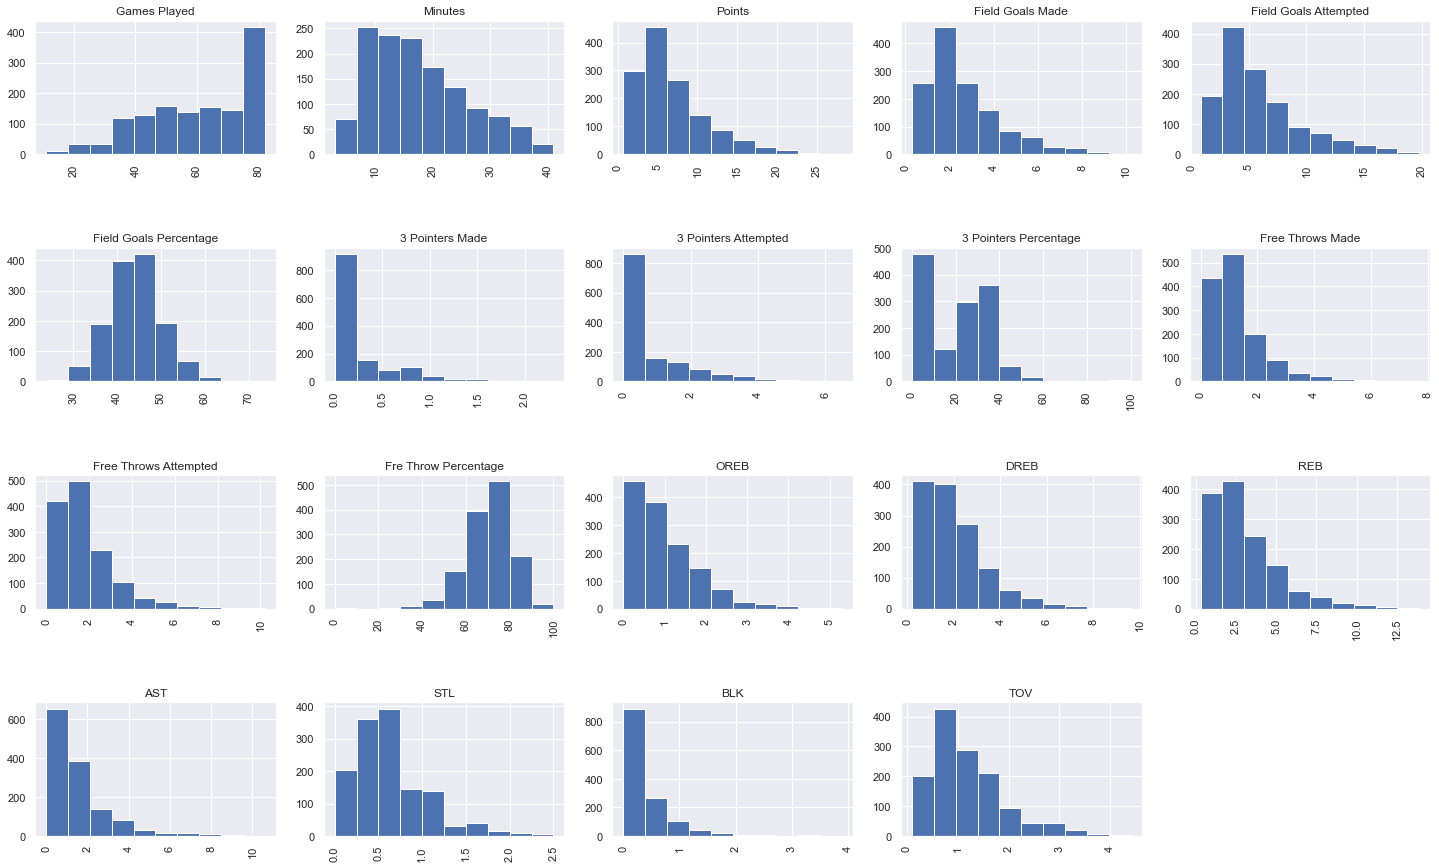

In [18]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(X.shape[1]) / cols)
for i, column in enumerate(X.columns):
    ax = fig.add_subplot(rows, cols, i + 1);
    ax.set_title(column);
    if  X.dtypes[column] == np.object:
        X[column].value_counts().plot(kind="bar", axes=ax);
    else:
        X[column].hist(axes=ax);
        plt.xticks(rotation="vertical");
        
plt.subplots_adjust(hspace=0.7, wspace=0.2);

We can infer from the above plots that there exists some amount of skewness in our predictors

### Let's check the amount of skewness in our continuous predictors and depending on the type of skewness, let's apply the necessary transformations for removing the skewness

In [20]:
import scipy.stats as scs

features = []
skewness = []

for i in X.select_dtypes(include=np.number).columns:
    features.append(i)
    skewness.append(scs.skew(X[i]))
skewed = pd.DataFrame({'Features':features,'Skewness':skewness})
skewed

# If skewness is greater than 1 the feature is highly positively skewed
positively_skewed_variables = skewed[(skewed['Skewness']>1)]

# If the skewness is less than -1 the feature is highly negatively skewed.
negatively_skewed_variables = skewed[(skewed['Skewness']<-1)]

print('Positively Skewed Features \n',positively_skewed_variables)
print('*'*50)
print('Negatively Skewed Features \n',negatively_skewed_variables) 

,Features,Skewness
0,Games Played,-0.477208
1,Minutes,0.631549
2,Points,1.386670
3,Field Goals Made,1.341041
4,Field Goals Attempted,1.294430
5,Field Goals Percentage,0.208246
6,3 Pointers Made,2.030539
7,3 Pointers Attempted,1.810406
8,3 Pointers Percentage,0.300952
9,Free Throws Made,1.939825


Positively Skewed Features 
                  Features  Skewness
2   Points                 1.386670
3   Field Goals Made       1.341041
4   Field Goals Attempted  1.294430
6   3 Pointers Made        2.030539
7   3 Pointers Attempted   1.810406
9   Free Throws Made       1.939825
10  Free Throws Attempted  1.842416
12  OREB                   1.437972
13  DREB                   1.487014
14  REB                    1.480077
15  AST                    2.130429
16  STL                    1.363271
17  BLK                    2.801012
18  TOV                    1.339239
**************************************************
Negatively Skewed Features 
 Empty DataFrame
Columns: [Features, Skewness]
Index: []


In [ ]:
# Let's remove the skewness in the positively skewed variables by using a log transform
for i in positively_skewed_variables['Features']:
    X[i] = np.log1p(X[i])

In [ ]:
transformation affect logistic regression 
normalization/scalarization for logistic regression

transformation affect tree based

### Split train and test data into X_train ,y_train,X_test and y_test data and apply a vanilla logistic regression model

In [21]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

# Apply a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('The AUC_ROC_score for a logistic regression model is :' , roc_auc_score(y_test, y_pred))
print('The accuracy for logistic regression is : ', accuracy_score(y_test,y_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The AUC_ROC_score for a logistic regression model is : 0.6823796122576611
The accuracy for logistic regression is :  0.7189054726368159


In [22]:
#baseline - 
72
62
72/62

# 16% lift in accuracy 

72

62

1.1612903225806452

### Lets now train our data with Decision tree model. We will then predict our test data and compute the accuracy as well as the `roc_auc_score`.

- Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric i.e `roc_auc_score` on the test data. Use parameter `random_state = 42` for results reproducibility.

In [23]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)

# Fit the model on train data
dt.fit(X_train,y_train)

# accuracy
accuracy = dt.score(X_test,y_test)

# Predicted values for test data
y_pred_dt = dt.predict(X_test)

# ROC score
roc_score = roc_auc_score(y_test,y_pred_dt)
print('AUC_ROC_score is ',roc_score)
print('Accuracy score is ',accuracy_score(y_test,y_pred_dt))
print()

print(classification_report(y_test,y_pred_dt))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

AUC_ROC_score is  0.5873983739837398
Accuracy score is  0.6442786069651741

              precision    recall  f1-score   support

         0.0       0.57      0.33      0.42       156
         1.0       0.67      0.84      0.74       246

    accuracy                           0.64       402
   macro avg       0.62      0.59      0.58       402
weighted avg       0.63      0.64      0.62       402



In [24]:
# Baseline
64
62
64/62

64

62

1.032258064516129

We can see that Decision Tree is giving us an accuracy of 64% while the `AUC_ROC_score` is around 59%. 

### Next let's implement a Stacking Classifier consisting of one Decision Tree and Logistic regression and a  decision tree model as a meta classifier.


In [27]:
from mlxtend.classifier import StackingClassifier, StackingCVClassifier

In [30]:
classifier1 = LogisticRegression(C=0.1)
classifier2 = DecisionTreeClassifier(random_state=2, criterion='entropy', max_depth=4)

# classifier
classifier_list=[classifier1,classifier2]

# meta classifier
m_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=6)

# Stacking
# sclf = StackingClassifier(classifiers=classifier_list, meta_classifier=m_classifier)
# sclf.fit(X_train, y_train)
# y_pred_sclf = sclf.predict(X_test)

sclf = StackingCVClassifier(classifiers=classifier_list, meta_classifier=m_classifier, cv = 5)
sclf.fit(X_train, y_train)
y_pred_sclf = sclf.predict(X_test)

# s_score=sclf.score(X_train,y_train)
# print("Training score: %.2f " % s_score)

s_score = sclf.score(X_test, y_test)
print("Test score: %.2f " % s_score)
print('AUC_ROC_score is ', roc_auc_score(y_test, y_pred_sclf))

StackingCVClassifier(classifiers=[LogisticRegression(C=0.1, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                                  DecisionTreeClassifier(ccp_alpha=0.0,
                                                         cla

Test score: 0.71 
AUC_ROC_score is  0.6739368355222013


###  Now let's apply a Random Forest model
- Let the parameters for the model be `criterion='gini'`, `max_depth= 6`,`max_features= 'auto'`,`n_estimators= 11`

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(criterion='gini', max_depth= 6, max_features= 'auto', n_estimators= 11)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred_rf)

print('AUC_ROC score is ',roc_score)
print('Accuracy is ', accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

AUC_ROC score is  0.6619762351469668
Accuracy is  0.7039800995024875
              precision    recall  f1-score   support

         0.0       0.67      0.47      0.55       156
         1.0       0.72      0.85      0.78       246

    accuracy                           0.70       402
   macro avg       0.69      0.66      0.67       402
weighted avg       0.70      0.70      0.69       402



In [ ]:
DL - neural networks
tree based
svms
naiv bayes

Logistic Regression - Join the crowd - DL - Softmax classifer

### Let's try improving upon the accuracy of the Random Forest using hyperparameter tuning

In [ ]:
combinations - 90
cv = 5
RF = 450

In [32]:
rfc = RandomForestClassifier(random_state=2)
param_grid = { 'n_estimators': [11,12,13], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']
             }

# grid search cv
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
grid_search_model.fit(X_train, y_train)

grid_search_model.best_params_

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 11}

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(criterion='entropy', max_depth= 4, max_features= 'auto', n_estimators= 11)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred_rf)

print('AUC_ROC score is ',roc_score)
print('Accuracy is ', accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

AUC_ROC score is  0.683552220137586
Accuracy is  0.7189054726368159
              precision    recall  f1-score   support

         0.0       0.68      0.53      0.59       156
         1.0       0.74      0.84      0.79       246

    accuracy                           0.72       402
   macro avg       0.71      0.68      0.69       402
weighted avg       0.71      0.72      0.71       402



In [ ]:
rfc.

In [ ]:
logistic regression - equation
coeff
P(y = 1) = 1/1 + e-(b0 + b1x1)

### Now let's apply a Voting Classifier that consists of three models - Logistic Regression, Decision Tree and a Random Forest with a soft voting

In [34]:
# Import libraries
from sklearn.ensemble import VotingClassifier

# Various models
clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier(random_state=4)
clf_3 = RandomForestClassifier(random_state=4)

model_list = [('lr',clf_1),('DT',clf_2),('RF',clf_3)]

# Initialize voting classifier
voting_clf_hard = VotingClassifier(estimators=model_list, voting='soft')

# Fit the model on training data
voting_clf_hard.fit(X_train,y_train)

# predict on test
y_pred_vot = voting_clf_hard.predict(X_test)

# accuracy
hard_voting_score = voting_clf_hard.score(X_test, y_test)

print(roc_auc_score(y_test, y_pred_vot))
print(accuracy_score(y_test, y_pred_vot))
print(classification_report(y_test, y_pred_vot))

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('DT',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

0.6202313946216385
0.6442786069651741
              precision    recall  f1-score   support

         0.0       0.54      0.51      0.53       156
         1.0       0.70      0.73      0.71       246

    accuracy                           0.64       402
   macro avg       0.62      0.62      0.62       402
weighted avg       0.64      0.64      0.64       402



### Let's check how a bagging classifier using a Decision Tree performs on our data

In [35]:
X.shape

(1340, 19)

In [36]:
# Import Bagging Classifier
from sklearn.ensemble import BaggingClassifier

# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), random_state=0,
                                n_estimators=100, max_samples=100)

# Code starts here

# Fit the model on training data
bagging_clf.fit(X_train,y_train)

# Predicted values of X_test
y_pred_bagging = bagging_clf.predict(X_test)

# accuracy 
print('Accuracy is ',bagging_clf.score(X_test,y_test))

# roc_score
score_bagging = roc_auc_score(y_test,y_pred_bagging)

print('AUC_ROC_score is ',score_bagging)
print(classification_report(y_test,y_pred_bagging))

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


Accuracy is  0.7238805970149254
AUC_ROC_score is  0.6864446529080674
              precision    recall  f1-score   support

         0.0       0.69      0.52      0.59       156
         1.0       0.74      0.85      0.79       246

    accuracy                           0.72       402
   macro avg       0.71      0.69      0.69       402
weighted avg       0.72      0.72      0.71       402



### Let's now visualize the AUC_ROC scores for all the models in one plot

In [ ]:
mean and std, test score

classifier, cv_mean, cv_std, test_score, test_auc

logreg_vanilla
logreg_tuned_1
logreg_tuned_2
logreg_tuned_3

dt_vanilla
dt_tune_1

In [37]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

classifiers = [logreg, dt, rfc, bagging_clf, voting_clf_hard, sclf]


for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.00641025641025641, 0.00641025641025641, 0.01282051282051282, 0.01282051282051282, 0.019230769230769232, 0.019230769230769232, 0.02564102564102564, 0.02564102564102564, 0.03205128205128205, 0.03205128205128205, 0.038461538461538464, 0.038461538461538464, 0.04487179487179487, 0.04487179487179487, 0.05128205128205128, 0.05128205128205128, 0.057692307692307696, 0.057692307692307696, 0.0641025641025641, 0.0641025641025641, 0.07051282051282051, 0.07051282051282051, 0.08333333333333333, 0.08333333333333333, 0.08974358974358974, 0.08974358974358974, 0.09615384615384616, 0.09615384615384616, 0.11538461538461539, 0.11538461538461539, 0.12179487179487179, 0.12179487179487179, 0.1346153846153846, 0.1346153846153846, 0.14102564102564102, 0.14102564102564102, 0.15384615384615385, 0.15384615384615385, 0.19230769230769232, 0.19230769230769232, 0.20512820512820512, 0.20512820512820512, 0.21153846153846154, 0.21153846153846154, 0.22435897435897437, 0.22435897435897437, 0.23076923076923078, 0.23076923076923078, 0.23717948717948717, 0.23717948717948717, 0.24358974358974358, 0.24358974358974358, 0.25, 0.25, 0.2564102564102564, 0.2564102564102564, 0.27564102564102566, 0.27564102564102566, 0.28205128205128205, 0.28205128205128205, 0.2948717948717949, 0.2948717948717949, 0.3076923076923077, 0.3076923076923077, 0.3141025641025641, 0.3141025641025641, 0.3269230769230769, 0.3269230769230769, 0.3525641025641026, 0.3525641025641026, 0.358974358974359, 0.358974358974359, 0.36538461538461536, 0.36538461538461536, 0.3782051282051282, 0.3782051282051282, 0.38461538461538464, 0.38461538461538464, 0.391025641025641, 0.391025641025641, 0.3974358974358974, 0.3974358974358974, 0.40384615384615385, 0.40384615384615385, 0.41025641025641024, 0.41025641025641024, 0.4166666666666667, 0.4166666666666667, 0.42948717948717946, 0.42948717948717946, 0.4551282051282051, 0.4551282051282051, 0.47435897435897434, 0.47435897435897434, 0.4807692307692308, 0.4807692307692308, 0.48717948717948717, ...]","[0.0, 0.0040650406504065045, 0.13414634146341464, 0.13414634146341464, 0.17479674796747968, 0.17479674796747968, 0.2032520325203252, 0.2032520325203252, 0.23983739837398374, 0.23983739837398374, 0.3252032520325203, 0.3252032520325203, 0.32926829268292684, 0.32926829268292684, 0.33739837398373984, 0.33739837398373984, 0.3699186991869919, 0.3699186991869919, 0.4349593495934959, 0.4349593495934959, 0.44715447154471544, 0.44715447154471544, 0.4715447154471545, 0.4715447154471545, 0.5, 0.5, 0.5040650406504065, 0.5040650406504065, 0.5203252032520326, 0.5203252032520326, 0.524390243902439, 0.524390243902439, 0.5284552845528455, 0.5284552845528455, 0.5650406504065041, 0.5650406504065041, 0.5772357723577236, 0.5772357723577236, 0.5813008130081301, 0.5813008130081301, 0.5853658536585366, 0.5853658536585366, 0.6016260162601627, 0.6016260162601627, 0.6138211382113821, 0.6138211382113821, 0.6219512195121951, 0.6219512195121951, 0.6300813008130082, 0.6300813008130082, 0.6382113821138211, 0.6382113821138211, 0.6422764227642277, 0.6422764227642277, 0.6463414634146342, 0.6463414634146342, 0.6544715447154471, 0.6544715447154471, 0.6626016260162602, 0.6626016260162602, 0.6707317073170732, 0.6707317073170732, 0.6747967479674797, 0.6747967479674797, 0.6829268292682927, 0.6829268292682927, 0.6951219512195121, 0.6991869918699187, 0.7235772357723578, 0.7235772357723578, 0.7317073170731707, 0.7317073170731707, 0.7439024390243902, 0.7439024390243902, 0.7520325203252033, 0.7520325203252033, 0.7682926829268293, 0.7682926829268293, 0.7764227642276422, 0.7764227642276422, 0.7804878048780488, 0.7804878048780488, 0.7886178861788617, 0.7886178861788617, 0.7926829268292683, 0.7926829268292683, 0.8130081300813008, 0.8130081300813008, 0.8170731707317073, 0.8170731707317073, 0.8292682926829268, 0.8292682926829268, 0.8373983739837398, 0.8373983739837398, 0.8414634146341463, 0.8414634146341463, 0.8455284552845529, 0.8455284552845529, 0.8495934959349594, 0

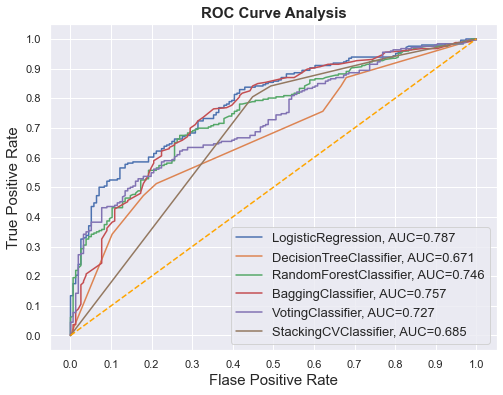

In [39]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']));
    
plt.plot([0,1], [0,1], color='orange', linestyle='--');

plt.xticks(np.arange(0.0, 1.1, step=0.1));
plt.xlabel("Flase Positive Rate", fontsize=15);

plt.yticks(np.arange(0.0, 1.1, step=0.1));
plt.ylabel("True Positive Rate", fontsize=15);

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15);
plt.legend(prop={'size':13}, loc='lower right');

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Overview
***
* Random Forest is a bagging algorithm with decision tree as base classifier/regressor
* The Random Forest algorithm introduces extra randomness when growing trees 
* Instead of searching for the very best feature when splitting a node it searches for the best feature among a random subset of features. 
* This results in a greater tree diversity, which trades a higher bias for a lower variance, generally yielding an overall better model. 

- Random Forests can be easily deployed in a distributed fashion due to the fact that they can run in parallel and for imbalanced data Random Forest stratifys the sampling.
- And it is true that they are more robust to overfitting and require less tuning to avoid it.

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>

<br />

# In-session Recap Time
***
* Decision Trees and their weakness
* Enseble of decision trees
* Hyperparameter tuning of random forest


# Thank You
***
### Next Session: Boosting Ensemble and XGBoost


In [ ]:
Gini gain (Feature) = Parent(GI) - Child(GI)